In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.DataFrame()
def merge(inpath, outpath):
    excellist = os.listdir(inpath)
    dfs = list()
    
    for f in excellist:
        df = pd.read_csv(inpath+f)
        dfs.append(df)
        
    totaldf = pd.concat(dfs)
    totaldf.to_excel(outpath, index=False)

merge(workplace/Data/Data/ , workplace/Data/Data/)

In [3]:
folder_path = "workplace/Data/Data"
all_data = pd.DataFrame()

for fname in os.listdir(folder_path):
    if fname.endswith(".csv"):
        # 讀
        csv_path = os.path.join(folder_path, fname)
        data = pd.read_csv(csv_path)
        
        # 抓文件名
        company = os.path.splitext(fname)[0]
        
        # 處理低能列，又有string又有float又有數字破千會導致部分作法出問題的attribute
        data['Price'] = data['Price'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)
        #.apply()是pandas的東西，通常用lambda表達式，告訴code要幹嘛
        #   dataframe.apply(lambda x: some_function(x))    標準格式，隨時可在dataframe那加個[xxx]來指定要apply的行列
 
        # 加 'Company'head,把文件名bang公司名稱
        data['Company'] = company
        
        # 將 'Date' 列轉換為日期類型(竟然有這種東西)
        data['Date'] = pd.to_datetime(data['Date'])
        
        # 將當前 CSV 文件的數據加到總數據中
        all_data = pd.concat([all_data, data])

all_data.drop(columns=["Open","High","Low","Vol.","Change %"], inplace=True)
all_data['Company'] = all_data['Company'].apply(lambda x: x.split(' ')[0] 
                                                if x in ['0H4A Historical Data', 'EZJ Historical Data', 
                                                         'IAGl Historical Data', 'JET2 Historical Data']else x)
all_data.to_csv('all_data.csv', index=False)  #抓出來做成新csv

alldatashow = pd.set_option('display.max_rows', 500)
print(alldatashow)

pivot = pd.pivot_table(all_data, index='Date', columns='Company', values='Price')
#print (pivot)

cleanpivot = pivot.dropna()
print(cleanpivot)
#missdate = all_data[all_data['Company'] == '0H4A Historical Data']['Date']
#filterdata = all_data[~(all_data['Date'].isin(missdate))]
#filterdata.to_csv('filterdata.csv', index=False)






None
Company      0H4A      EZJ    IAGl     JET2
Date                                       
2015-05-01  12.98  1354.64  559.49   414.50
2015-06-01  11.56  1301.60  493.96   395.00
2015-07-01  12.35  1384.10  538.53   446.00
2015-08-01  11.03  1416.94  539.53   453.00
2015-09-01  12.43  1496.08  583.24   484.00
2015-10-01  13.43  1473.35  573.36   473.25
2015-11-01  13.69  1391.68  568.25   521.50
2015-12-01  14.56  1464.93  610.00   588.50
2016-01-01  13.40  1303.28  535.36   553.50
2016-02-01  13.73  1267.92  545.56   569.50
2016-03-01  14.29  1278.87  552.50   664.00
2016-04-01  13.56  1240.14  526.75   624.50
2016-05-01  12.59  1290.65  536.50   648.50
2016-06-01  10.44   914.32  370.86   527.00
2016-07-01  10.63   876.43  407.80   485.00
2016-08-01  10.48   930.31  383.30   448.75
2016-09-01   9.84   847.81  398.40   419.00
2016-10-01  11.63   788.87  434.60   358.75
2016-11-01  12.23   833.49  434.10   477.00
2016-12-01  12.31   846.12  439.10   496.00
2017-01-01  12.41   799.82 

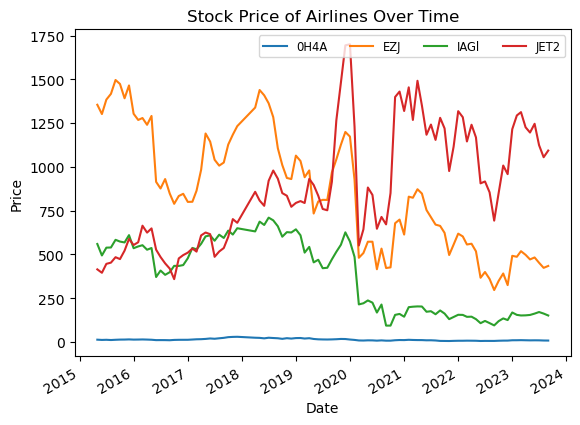

In [38]:
cleanpivot.plot()

#for company in cleanpivot.columns:
#   plt.plot(cleanpivot.index, cleanpivot[company], label=company)


#ax = plt.gca()
#ax.xaxis.set_major_locator(MonthLocator(bymonth=5, bymonthday=1))
#ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
#plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price of Airlines Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=4)
# ncol=4,loc='upper center', 
plt.grid(False)
plt.show()


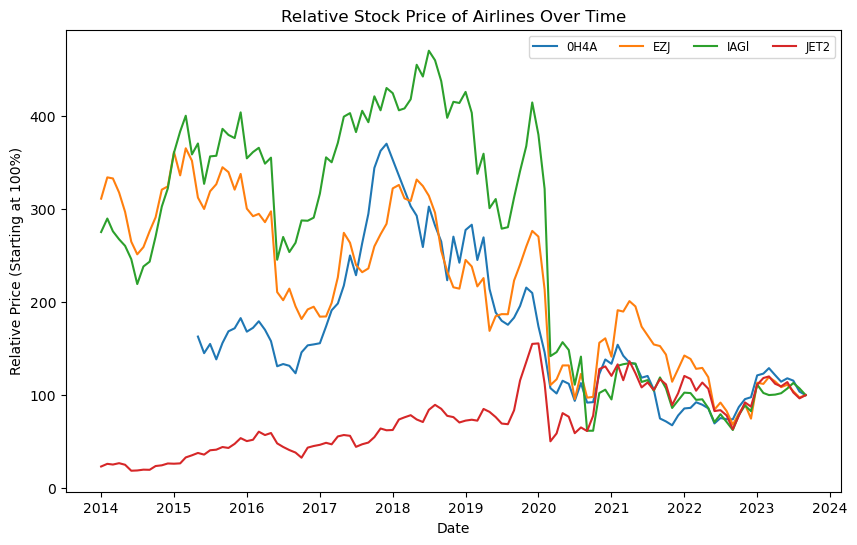

In [42]:
relative_data = pd.DataFrame()

# 將每個股票的價格轉換為相對價格
for company in cleanpivot['Company'].unique():
    comdata = all_data[all_data['Company'] == company].copy()
    comdata['Relative_Price'] = (comdata['Price'] / comdata.iloc[0]['Price']) * 100
    relative_data = pd.concat([relative_data, comdata])

# 創建一個時間序列圖來比較相對價格
grouped_data = relative_data.groupby('Company')

plt.figure(figsize=(10, 6))
for company, data_group in grouped_data:
    plt.plot(data_group['Date'], data_group['Relative_Price'], label=company)

plt.xlabel('Date')
plt.ylabel('Relative Price (Starting at 100%)')
plt.title('Relative Stock Price of Airlines Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=4)
plt.grid(False)
plt.show()

In [ ]:
#IAGI = pd.read_csv("workplace/Data/Data/IAGl Historical Data.csv")
#EZJ  = pd.read_csv("workplace/Data/Data/EZJ Historical Data.csv")
#JET2 = pd.read_csv("workplace/Data/Data/JET2 Historical Data.csv")
#H4A  = pd.read_csv("workplace/Data/Data/0H4A Historical Data.csv")

#IAGI['Company'] = 'IAGI' 
#EZJ['Company'] = 'EZJ'
#JET2['Company'] = 'JET2'
#H4A['Company'] = '0H4A'

#IAGI.plot(x ='Date', y ='Price',label='IAGI')
#EZJ['Price'] = EZJ['Price'].str.replace(',', '')
#EZJ['Price'] = EZJ['Price'].astype(float)
#EZJ.plot(x ='Date', y ='Price',label=company)

In [33]:
data = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [2.0, 3.0, None, 5.0, 6.0],
                     'C': ['a', 'b', 'c', None, 'e']})

# 刪除包含NaN值的行
data_cleaned = data.dropna()

# 輸出結果
print(data_cleaned)

   A    B  C
0  1  2.0  a
1  2  3.0  b
4  5  6.0  e


In [ ]:
plt.plot('Date', 'Price',label=company)

In [4]:
combined_data = pd.concat([IAGI, EZJ, JET2, H4A], ignore_index=True)
combined_data.to_csv('combined_data.csv', index=False)
combined_data

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,09/01/2023,151.15,162.55,163.53,150.7,NaN,-6.77%,IAGI
1,08/01/2023,162.12,171.0,172.9,157.5,NaN,-5.13%,IAGI
2,07/01/2023,170.88,162.65,171.85,149.4,NaN,5.55%,IAGI
3,06/01/2023,161.9,154.5,166.9,153.2,NaN,4.96%,IAGI
4,05/01/2023,154.25,153.05,162.2,144.95,NaN,1.50%,IAGI
...,...,...,...,...,...,...,...,...
444,09/01/2015,12.43,10.97,12.50,10.53,NaN,12.65%,0H4A
445,08/01/2015,11.03,12.36,12.47,10.27,NaN,-10.69%,0H4A
446,07/01/2015,12.35,11.66,13.15,11.34,NaN,6.79%,0H4A
447,06/01/2015,11.56,12.85,12.85,11.4,NaN,-10.94%,0H4A


In [5]:
#dataframe = pd.DataFrame()
#dataframe = pd.concat([dataframe, vars()["datarame_"+]])
combined_data.describe()

,Date,Price,Open,High,Low,Vol.,Change %,Company
count,449,449,449,449.0,449.00,266,449,449
unique,117,442,435,440.0,444.00,258,425,4
top,09/01/2023,930.31,809.08,637.0,5.83,13.22M,-5.95%,IAGI
freq,4,2,3,2.0,2.00,2,3,117


<function matplotlib.pyplot.show(close=None, block=None)>

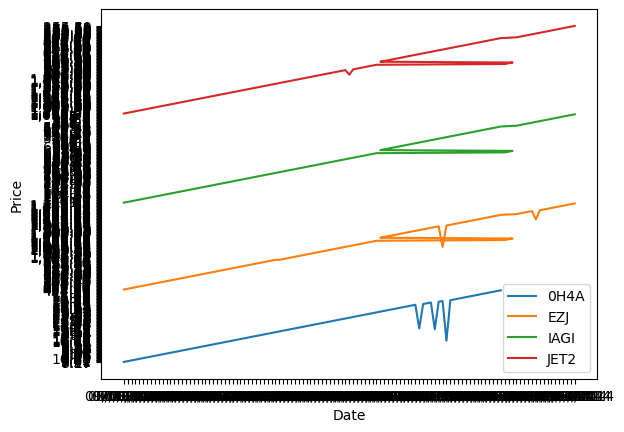

In [22]:
#combined_data2 = pd.read_csv('combined_data.csv')
grouped_data = combined_data.groupby('Company')
#plt.figure(figsize=(10, 6))

#for company, group in grouped_data:
    #group = group.sort_values(by='Date')
    #plt.plot(group['Date'], group['Price'],label=company)
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show